# Test using narrow-band filters to separate the two frequency components of a twin template event

In [116]:
# Import modules
from os.path import join
from obspy import read, UTCDateTime
from numpy import amax, abs
from pandas import DataFrame, Timedelta, Timestamp
from matplotlib.pyplot import subplots

from utils_basic import ROOTDIR
from utils_cc import get_timewin_from_template_name
from utils_preproc import read_and_process_windowed_waveforms
from utils_snuffler import read_normal_markers
from utils_spec import get_data_spectrum, get_data_psd, get_filter_response

In [117]:
# Inputs
## Time windows and stations
station = "B01"
tempname = "TwinB16-08-06-34"
phase = "X"

begin_read = -0.5
end_read = 1.5

## Filtering paramgters
freqmin_low = 10
freqmax_low = 95

freqmin_high = 95
freqmax_high = 450

corners = 20

## Plotting parameters
begin_plot = -0.025
end_plot = 0.15
linewidth_short = 3
linewidth_long = 1
linewidth_psd = 1.5

freqmin_plot = 10.0

## Scale factors for plotting the waveforms and PSDs
scale_wf = 1.05
scale_psd = 3.0

psdmin = 1e-2

In [118]:
# Read the snuffler pick file
timewin = get_timewin_from_template_name(tempname)
pickdf = read_normal_markers(join(ROOTDIR, timewin, f"{phase.lower()}picks_{tempname}.dat"))

In [119]:
# Read and process the data
stream = read_and_process_windowed_waveforms(pickdf, freqmin_low, freqmax_high, begin=begin_read, end=end_read, stations=[station], corners=corners)
stream_low = read_and_process_windowed_waveforms(pickdf, freqmin_low, freqmax_low, begin=begin_read, end=end_read, stations=[station], corners=corners)
stream_high = read_and_process_windowed_waveforms(pickdf, freqmin_high, freqmax_high, begin=begin, end=end_read, stations=[station], corners=corners)

B01
B01
B01


Figure saved to /Volumes/OmanData/geophones_no_prefilt/data/2020-01-16-08-00-00/narrow_band_filter_test_TwinB16-08-06-34_B01.png


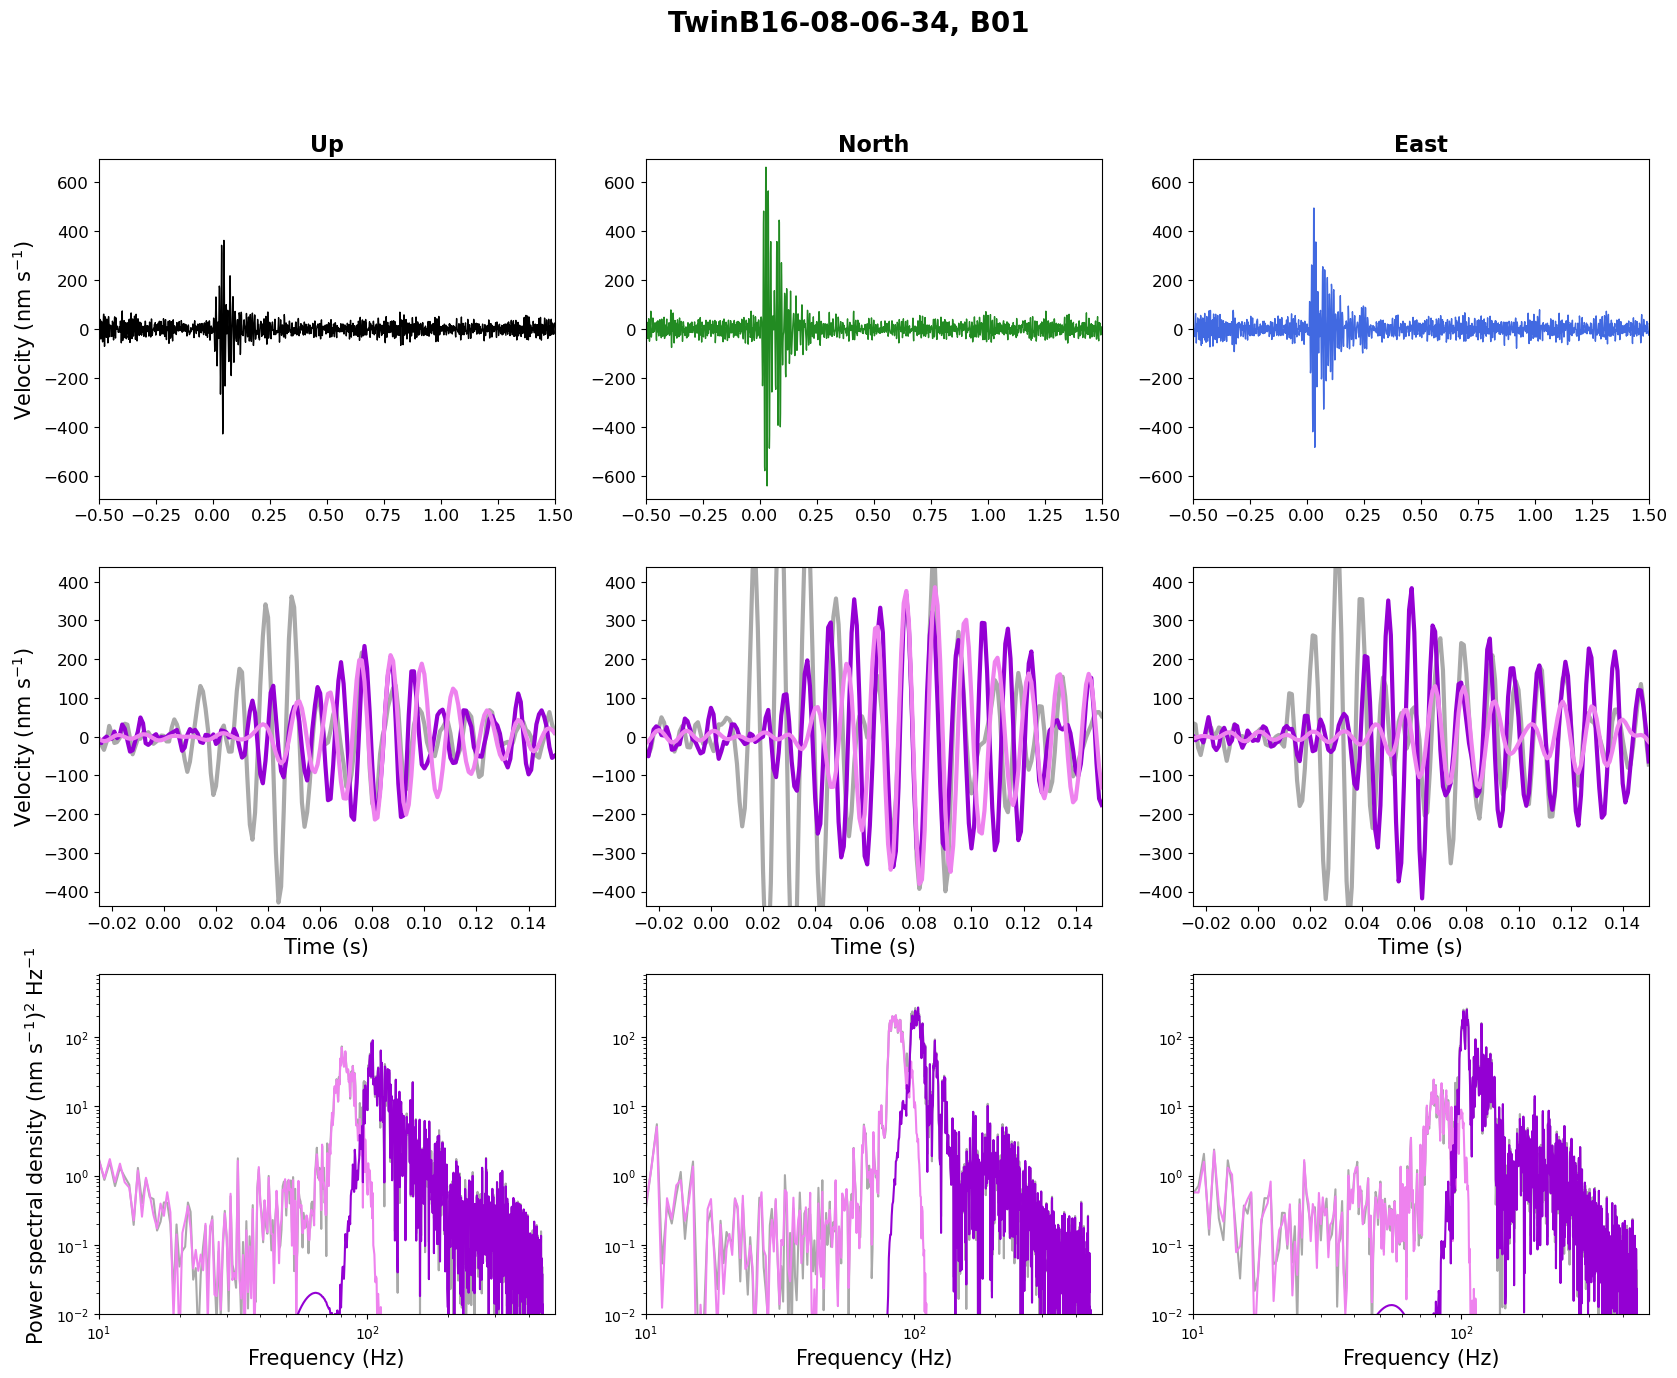

In [120]:
# Plot the waveforms

## Get the traces
trace_z = stream.select(station=station, component="Z")[0]
trace_low_z = stream_low.select(station=station, component="Z")[0]
trace_high_z = stream_high.select(station=station, component="Z")[0]

trace_1 = stream.select(station=station, component="1")[0]
trace_low_1 = stream_low.select(station=station, component="1")[0]
trace_high_1 = stream_high.select(station=station, component="1")[0]

trace_2 = stream.select(station=station, component="2")[0]
trace_low_2 = stream_low.select(station=station, component="2")[0]
trace_high_2 = stream_high.select(station=station, component="2")[0]

data_z = trace_z.data
data_low_z = trace_low_z.data
data_high_z = trace_high_z.data

data_1 = trace_1.data
data_low_1 = trace_low_1.data
data_high_1 = trace_high_1.data

data_2 = trace_2.data
data_low_2 = trace_low_2.data
data_high_2 = trace_high_2.data

timeax = trace_z.times()+begin_read



## Plot the original waveforms in the long time window
fig, axes = subplots(3, 3, figsize=(20, 15))

velmax = amax([amax(abs(data_z)), amax(abs(data_1)), amax(abs(data_2))]) * scale_wf

axes[0, 0].plot(timeax, data_z, color="black", linewidth=linewidth_long)
axes[0, 0].set_title("Up", fontsize=16, fontweight="bold")
axes[0, 0].set_xlim(begin_read, end_read)
axes[0, 0].set_ylim(-velmax, velmax)
axes[0, 0].set_ylabel("Velocity (nm s$^{-1}$)", fontsize=15)

for label in axes[0, 0].get_xticklabels():
    label.set_fontsize(12)

axes[0, 1].plot(timeax, data_1, color="forestgreen", linewidth=linewidth_long)
axes[0, 1].set_title("North", fontsize=16, fontweight="bold")
axes[0, 1].set_xlim(begin_read, end_read)
axes[0, 1].set_ylim(-velmax, velmax)

for label in axes[0, 1].get_xticklabels():
    label.set_fontsize(12)

axes[0, 2].plot(timeax, data_2, color="royalblue", linewidth=linewidth_long)
axes[0, 2].set_title("East", fontsize=16, fontweight="bold")
axes[0, 2].set_xlim(begin_read, end_read)
axes[0, 2].set_ylim(-velmax, velmax)

## Plot the filtered waveforms in the short time window
velmax = amax([amax(abs(data_low_z)), amax(abs(data_high_z)), amax(abs(data_low_1)), amax(abs(data_high_1)), amax(abs(data_low_2)), amax(abs(data_high_2))]) * scale_wf

axes[1, 0].plot(timeax, data_z, color="darkgray", linewidth=linewidth_short)
axes[1, 0].plot(timeax, data_high_z, color="darkviolet", linewidth=linewidth_short)
axes[1, 0].plot(timeax, data_low_z, color="violet", linewidth=linewidth_short)
axes[1, 0].set_xlim(begin_plot, end_plot)
axes[1, 0].set_ylim(-velmax, velmax)
axes[1, 0].set_xlabel("Time (s)", fontsize=15)
axes[1, 0].set_ylabel("Velocity (nm s$^{-1})$", fontsize=15)

for label in axes[0, 0].get_xticklabels():
    label.set_fontsize(12)

for label in axes[0, 0].get_yticklabels():
    label.set_fontsize(12)

axes[1, 1].plot(timeax, data_1, color="darkgray", linewidth=linewidth_short)
axes[1, 1].plot(timeax, data_high_1, color="darkviolet", linewidth=linewidth_short)
axes[1, 1].plot(timeax, data_low_1, color="violet", linewidth=linewidth_short)
axes[1, 1].set_xlim(begin_plot, end_plot)
axes[1, 1].set_ylim(-velmax, velmax)
axes[1, 1].set_xlabel("Time (s)", fontsize=15)

for l2bel in axes[0, 1].get_xticklabels():
    l2bel.set_fontsize(12)

for l2bel in axes[0, 1].get_yticklabels():
    l2bel.set_fontsize(12)

axes[1, 2].plot(timeax, data_2, color="darkgray", linewidth=linewidth_short)
axes[1, 2].plot(timeax, data_high_2, color="darkviolet", linewidth=linewidth_short)
axes[1, 2].plot(timeax, data_low_2, color="violet", linewidth=linewidth_short)
axes[1, 2].set_xlim(begin_plot, end_plot)
axes[1, 2].set_ylim(-velmax, velmax)
axes[1, 2].set_xlabel("Time (s)", fontsize=15)

for label in axes[0, 2].get_xticklabels():
    label.set_fontsize(12)

for label in axes[0, 2].get_yticklabels():
    label.set_fontsize(12)

## Plot the PSDs
samprat = trace_z.stats.sampling_rate
numpts = trace_z.stats.npts

freqax_data, psd_z = get_data_psd(data_z, samprat)
freqax_data, psd_low_z = get_data_psd(data_low_z, samprat)
freqax_data, psd_high_z = get_data_psd(data_high_z, samprat)

freqax_data, psd_1 = get_data_psd(data_1, samprat)
freqax_data, psd_low_1 = get_data_psd(data_low_1, samprat)
freqax_data, psd_high_1 = get_data_psd(data_high_1, samprat)

freqax_data, psd_2 = get_data_psd(data_2, samprat)
freqax_data, psd_low_2 = get_data_psd(data_low_2, samprat)
freqax_data, psd_high_2 = get_data_psd(data_high_2, samprat)

psdmax = amax([amax(psd_z), amax(psd_low_z), amax(psd_high_z), amax(psd_1), amax(psd_low_1), amax(psd_high_1), amax(psd_2), amax(psd_low_2), amax(psd_high_2)]) * scale_psd

axes[2, 0].plot(freqax_data, psd_z, color="darkgray", linewidth=linewidth_psd)
axes[2, 0].plot(freqax_data, psd_low_z, color="violet", linewidth=linewidth_psd)
axes[2, 0].plot(freqax_data, psd_high_z, color="darkviolet", linewidth=linewidth_psd)
axes[2, 0].set_xscale("log")
axes[2, 0].set_yscale("log")
axes[2, 0].set_xlim(freqmin_plot, freqax_data[-1])
axes[2, 0].set_ylim(psdmin, psdmax)
axes[2, 0].set_ylabel("Power spectral density (nm s$^{-1}$)$^{2}$ Hz$^{-1}$", fontsize=15)
axes[2, 0].set_xlabel("Frequency (Hz)", fontsize=15)

for l2bel in axes[1, 0].get_xticklabels():
    l2bel.set_fontsize(12)

for l2bel in axes[1, 0].get_yticklabels():
    l2bel.set_fontsize(12)

axes[2, 1].plot(freqax_data, psd_1, color="darkgray", linewidth=linewidth_psd)
axes[2, 1].plot(freqax_data, psd_low_1, color="violet", linewidth=linewidth_psd)
axes[2, 1].plot(freqax_data, psd_high_1, color="darkviolet", linewidth=linewidth_psd)
axes[2, 1].set_xscale("log")
axes[2, 1].set_yscale("log")
axes[2, 1].set_xlim(freqmin_plot, freqax_data[-1])
axes[2, 1].set_ylim(psdmin, psdmax)
axes[2, 1].set_xlabel("Frequency (Hz)", fontsize=15)

for label in axes[1, 1].get_xticklabels():
    label.set_fontsize(12)

for label in axes[1, 1].get_yticklabels():
    label.set_fontsize(12)

axes[2, 2].plot(freqax_data, psd_2, color="darkgray", linewidth=linewidth_psd)
axes[2, 2].plot(freqax_data, psd_low_2, color="violet", linewidth=linewidth_psd)
axes[2, 2].plot(freqax_data, psd_high_2, color="darkviolet", linewidth=linewidth_psd)
axes[2, 2].set_xscale("log")
axes[2, 2].set_yscale("log")
axes[2, 2].set_xlim(freqmin_plot, freqax_data[-1])
axes[2, 2].set_ylim(psdmin, psdmax)
axes[2, 2].set_xlabel("Frequency (Hz)", fontsize=15)

for label in axes[1, 2].get_xticklabels():
    label.set_fontsize(12)

for label in axes[1, 2].get_yticklabels():
    label.set_fontsize(12)

fig.suptitle(f"{tempname}, {station}", fontsize=20, fontweight="bold")
fig.patch.set_alpha(0)

## Save the figure
outpath = join(ROOTDIR, timewin, f"narrow_band_filter_test_{tempname}_{station}.png")
fig.savefig(outpath, dpi=300)
print(f"Figure saved to {outpath}")
